<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><1.Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Визуализация-ряда" data-toc-modified-id="Визуализация-ряда-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Визуализация ряда</a></span></li><li><span><a href="#Функция-для-добавления-признаков." data-toc-modified-id="Функция-для-добавления-признаков.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Функция для добавления признаков.</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Функция-для-разбиения-на-выборки" data-toc-modified-id="Функция-для-разбиения-на-выборки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для разбиения на выборки</a></span></li><li><span><a href="#Поиск-лучшей-модели" data-toc-modified-id="Поиск-лучшей-модели-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Поиск лучшей модели</a></span><ul class="toc-item"><li><span><a href="#Модель-линейной-регрессии" data-toc-modified-id="Модель-линейной-регрессии-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Модель линейной регрессии</a></span></li></ul></li><li><span><a href="#Сильно-уменьшенный-перебор-для-основания-коментария-выше" data-toc-modified-id="Сильно-уменьшенный-перебор-для-основания-коментария-выше-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Сильно уменьшенный перебор для основания коментария выше</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Дерево решений</a></span></li></ul></li><li><span><a href="#Модель-случайного-леса" data-toc-modified-id="Модель-случайного-леса-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Модель случайного леса</a></span><ul class="toc-item"><li><span><a href="#Тяжёлая-артилерия(бустинг)" data-toc-modified-id="Тяжёлая-артилерия(бустинг)-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Тяжёлая артилерия(бустинг)</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Проверка-модели-на-адекватность" data-toc-modified-id="Проверка-модели-на-адекватность-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Проверка модели на адекватность</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

In [129]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor
import lightgbm as lgbm

In [130]:
data = pd.read_csv("/datasets/taxi.csv")
data.head()

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
datetime      26496 non-null object
num_orders    26496 non-null int64
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


In [132]:
data['datetime'] = pd.to_datetime(data['datetime'])

Сразу заменим индексный столбец на столбец datetime.

In [133]:
data = data.set_index('datetime')
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


Сделаем ресемплирование до промежутка в один час.

In [134]:
data = data.resample("1H").sum()

In [135]:
data.describe()

,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000


У нас интервал в один час, 462 заказа могут показаться большим количеством, но всё-таки вполне реальным в праздники. Поэтому будем считать, что данные без аномалий.

In [136]:
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


## Анализ

In [137]:
data.index.is_monotonic

True

Данные расположенны в хронологическом порядке. Тут всё хорошо.

### Визуализация ряда

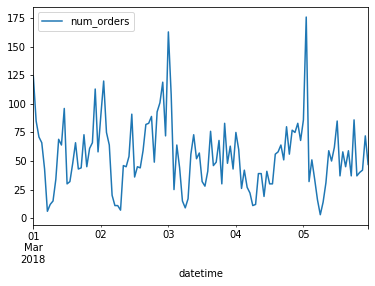

In [138]:
data['2018-03-1':'2018-03-5'].plot(ax = plt.gca())

Посмотрели на дневной фрейм. Виден восходящий тренд между 6 утра и 12 ночи, а потом ниспадающий тренд. По сути это сезонность зависящая от времени суток.

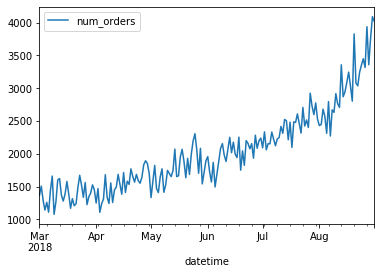

In [139]:
days_data = data.resample("1D").sum()
days_data.plot(ax = plt.gca())

Тут выполнили ресемплирование для того, чтобы на график можно было адекватно посмотреть(снизу график без ресемплирования). По графику виден явный восходящий тренд. Что также может помешать при прогнозировании.

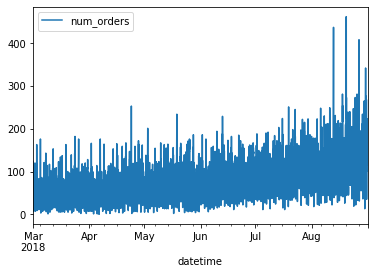

In [140]:
data.plot(ax = plt.gca())

### Функция для добавления признаков.

In [141]:
def make_features(data, max_lag, rolling_mean_size):
    new_data = data.copy()
    new_data['year'] = new_data.index.year
    new_data['month'] = new_data.index.month
    new_data['day'] = new_data.index.day
    new_data['dayofweek'] = new_data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        new_data['lag_{}'.format(lag)] = new_data['num_orders'].shift(lag)

    new_data['rolling_mean'] = new_data['num_orders'].shift().rolling(rolling_mean_size).mean()
    return new_data

## Обучение

### Функция для разбиения на выборки

In [142]:
def new_data(data):
    train, valid_and_test = train_test_split(data, shuffle=False, test_size=0.2)
    train = train.dropna()
    train_features = train.drop('num_orders', axis = 1)
    train_target = train['num_orders']
    valid, test = train_test_split(valid_and_test, shuffle=False, test_size=0.5)
    valid_features = valid.drop('num_orders', axis = 1) 
    valid_target = valid['num_orders']
    test_features = test.drop('num_orders', axis = 1)
    test_target = test['num_orders']
    return train_features, train_target, valid_features, valid_target, test_features, test_target

### Поиск лучшей модели

#### Модель линейной регрессии

In [143]:
best_score = 100
for max_lag in range(147,150):
    for rolling_mean_size in range(150, 250):
        modified_data = make_features(data, max_lag, rolling_mean_size)
        train_features, train_target, valid_features, valid_target, test_features, test_target = new_data(modified_data)      
        model = LinearRegression()
        model.fit(train_features, train_target)
        valid_predict = model.predict(valid_features)
        valid_score = mean_squared_error(valid_target, valid_predict)**0.5
        if best_score > valid_score:
            print(max_lag,rolling_mean_size, valid_score)
            best_score = valid_score
            best_model = model
    print(max_lag)

147 150 29.42016463095804
147 151 29.418540022410195
147 152 29.41507098096111
147 155 29.40613519105224
147 156 29.392459088035647
147 157 29.384647451427444
147 160 29.361551027373054
147 161 29.35552028127185
147 162 29.353213495866797
147 164 29.34215499727397
147 165 29.303075757824097
147 166 29.273654240275256
147 167 29.258613420256573
147 168 29.06105712055934
147 169 29.02300656227638
147
148 169 29.02286880333264
148 170 29.0149126670316
148 171 29.014171550042473
148
149 169 28.972278554144122
149 170 28.96657032132262
149


***Вывод***

Перебрав модели, лучшая модель получает метрику rmse равную 28.96... При знании модели о последних 149 измерениях и среднем скользящем из 170 значений. Будем искать оптимальные значения с этим набором признаков.

#### Дерево решений

In [144]:
modified_data = make_features(data, max_lag, rolling_mean_size)
train_features, train_target, valid_features, valid_target, test_features, test_target = new_data(modified_data)

best_tree_model = None
best_tree_result = 1000
for depth in range(1,20):
    model = DecisionTreeRegressor(max_depth = depth, random_state = 12345)
    model.fit(train_features, train_target)
    predicted_valid = model.predict(valid_features)
    result = mean_squared_error(valid_target, predicted_valid) ** .5
    if result < best_tree_result:
        best_tree_model = model
        best_tree_result = result
        best_depth = depth

print("RMSE лучшей модели дерева решений и её глубина:", best_tree_result, best_depth)

RMSE лучшей модели дерева решений и её глубина: 35.98960600467101 5


Дерево решений справилось хуже.

### Модель случайного леса

In [145]:
best_forest_model = None
best_forest_result = 1000
for est in range(1, 21):
    model = RandomForestRegressor(random_state = 12345, n_estimators = est) 
    model.fit(train_features, train_target)
    predicted_valid = model.predict(valid_features)
    result = mean_squared_error(valid_target, predicted_valid) **.5
    if result < best_forest_result:
        best_forest_model = model
        best_forest_result = result
        best_est = est
print("RMSE лучшей модели случайного леса:", best_forest_result)

RMSE лучшей модели случайного леса: 32.19611178494249


Модель случайного леса лучше дерева решений, однако всё-ещё хуже линейной регрессии.

#### Тяжёлая артилерия(бустинг)

In [146]:
def boost(params, features_train, features_valid, target_train, target_valid):
    train_data = lgbm.Dataset(features_train, target_train)
    valid_data = lgbm.Dataset(features_valid, target_valid)
    
    model = lgbm.train(params, train_data, valid_sets = valid_data, verbose_eval = params['verbose_eval'])

    predicted_valid = model.predict(features_valid)
    score = mean_squared_error(target_valid, y_pred = predicted_valid) ** 0.5
    print(score)
    return model

In [147]:
params = {
    "num_leaves": 220,
    "num_iterations" : 250,
    "metric" : "rmse",
    "learning_rate" : .03,
    "seed" : 12345,
    "verbose_eval" : True
}

In [148]:
model = boost(params, train_features, valid_features, train_target, valid_target)

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's rmse: 56.3664
[2]	valid_0's rmse: 55.4625
[3]	valid_0's rmse: 54.6022
[4]	valid_0's rmse: 53.7551
[5]	valid_0's rmse: 52.9675
[6]	valid_0's rmse: 52.1698
[7]	valid_0's rmse: 51.4093
[8]	valid_0's rmse: 50.7132
[9]	valid_0's rmse: 49.9946
[10]	valid_0's rmse: 49.3157
[11]	valid_0's rmse: 48.6981
[12]	valid_0's rmse: 48.0978
[13]	valid_0's rmse: 47.4778
[14]	valid_0's rmse: 46.9757
[15]	valid_0's rmse: 46.4483
[16]	valid_0's rmse: 45.9541
[17]	valid_0's rmse: 45.445
[18]	valid_0's rmse: 44.9825
[19]	valid_0's rmse: 44.4786
[20]	valid_0's rmse: 44.0512
[21]	valid_0's rmse: 43.6026
[22]	valid_0's rmse: 43.1712
[23]	valid_0's rmse: 42.7299
[24]	valid_0's rmse: 42.3311
[25]	valid_0's rmse: 41.91
[26]	valid_0's rmse: 41.5117
[27]	valid_0's rmse: 41.1678
[28]	valid_0's rmse: 40.7701
[29]	valid_0's rmse: 40.4422
[30]	valid_0's rmse: 40.1471
[31]	valid_0's rmse: 39.8022
[32]	valid_0's rmse: 39.5013
[33]	valid_0's rmse: 39.197
[34]	valid_0's rmse: 38.8798
[35]	valid_0's rmse: 38.588

Бустинг также не смог нам помочь победить линейную регрессию. Такой результат у деревьев и градиентного бустинга, который также использует деревья, можно списать на само устройство модели дерева. Оно не выходит за границы максимального и минимального значения, которые есть в тренировочных данных, а у нас восходящий тренд, который постепенно уходит от коридора, описанного тренировочными данными. 

## Тестирование

In [149]:
modified_data = make_features(data, 149, 170)
train_features, train_target, valid_features, valid_target, test_features, test_target = new_data(modified_data) 
pre_test_features = train_features.append(valid_features, ignore_index = True)
pre_test_target = train_target.append(valid_target, ignore_index = True)

best_model.fit(pre_test_features, pre_test_target)
test_predict = best_model.predict(test_features)
test_score = mean_squared_error(test_target, test_predict)**0.5
print(test_score)

39.61655017532594


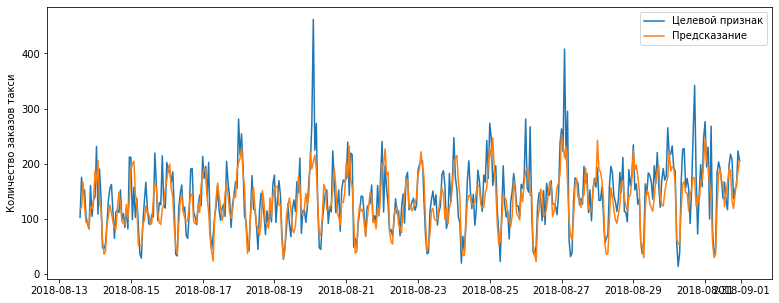

In [170]:
plt.figure(figsize = (13,5))
plt.ylabel('Количество заказов такси')
plt.plot(test_target, label = "Целевой признак")
plt.plot(pd.DataFrame(test_predict, test_target.index), label = "Предсказание")
plt.legend()
plt.show()

***Вывод***

Наша модель получила требуемое значение rmse в 48 и даже превысила его. На тестовой выборке значение метрики значительно ухудшилось. Это может быть связанно с переобучением, хотя такое плохое значение rmse наблюдалось только в начале перебора, что может говорить о том, что дальше мог пойти тренд, который менее предсказуем, чем тот, который попал в тренировочную выборку. Также можно заметить, что наше предсказание плохо работает с выбросами, где и получаются самые большие ошибки

### Проверка модели на адекватность

In [171]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(train_features, train_target)
dummy_predict = dummy_regr.predict(test_features)
dummy_result = mean_squared_error(test_target, dummy_predict) ** 0.5
print(dummy_result)

86.9386181592115


Наша модель явно адекватнее, чем простое тыкание наугад.